In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load data w/ laser on: data{tint}
data1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_1.00269_5.fits")
data2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_2.502526_5.fits")
data5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_5.002251_5.fits")
data10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_10.001702_5.fits")
data25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_25.000055_5.fits")
data50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_50.000493999999996_5.fits")
data100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_100.001373_5.fits")
data200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\-40.0C_199.996761_5.fits")
datas = [data1, data2_5, data5, data10, data25, data50, data100, data200]

# load darks
dark1 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_1.00269_5.fits")
dark2_5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_2.502526_5.fits")
dark5 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_5.002251_5.fits")
dark10 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_10.001702_5.fits")
dark25 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_25.000055_5.fits")
dark50 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_50.000493999999996_5.fits")
dark100 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_100.001373_5.fits")
dark200 = fits.getdata("D:\HWP_Characterization\Data\Raw\CRED2_Characterization\Linearity\Detector\darks\-40.0C_199.996761_5.fits")
darks = [dark1, dark2_5, dark5, dark10, dark25, dark50, dark100, dark200]

In [6]:
# average data and darks over 10 exposures
datas_avg = [np.mean(data, axis=0) for data in datas]
darks_avg = [np.mean(dark, axis=0) for dark in darks]

# subtract darks from data files
datas_sub = [data - dark for data, dark in zip(datas_avg, darks_avg)]

# slice data to get region w/ laser; find region manually with ds9
datas_slice = [data[312:339, 303:329] for data in datas_sub]

# get mean pixel value in region; this corresponds to the brightness(?)
means = [np.mean(data) for data in datas_slice]

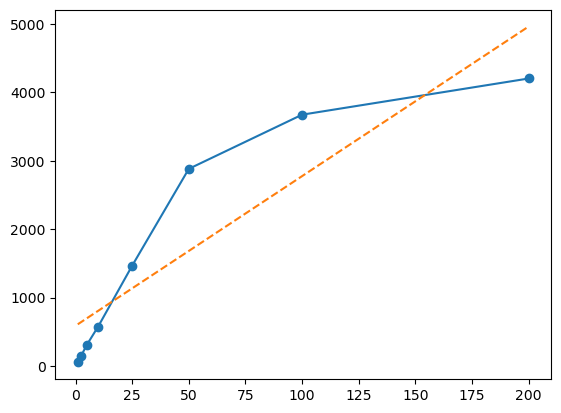

In [11]:
# plot tint vs. brightness(?)
tint = [1, 2.5, 5, 10, 25, 50, 100, 200] # ms

plt.plot(tint, means, '-o')

# plot linear fit (should be linear :,( )
coefs = np.polyfit(tint, means, 1)
fit_fn = np.poly1d(fit)
plt.plot(tint, fit_fn(tint), '--')